<a href="https://colab.research.google.com/github/sauce-Git/DAP/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


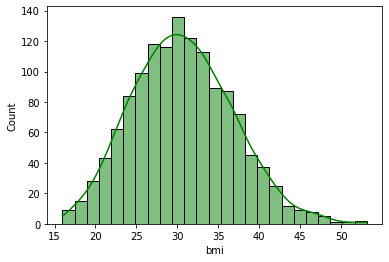

In [3]:
sns.histplot(data=df, x='bmi', color='green', kde=True)

In [4]:
df.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [31]:
attribute = 'charges'

Q1 = df[attribute].quantile(.25)
Q3 = df[attribute].quantile(.75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

filteredDf = df[df[attribute] < Q3 + outlier_step]

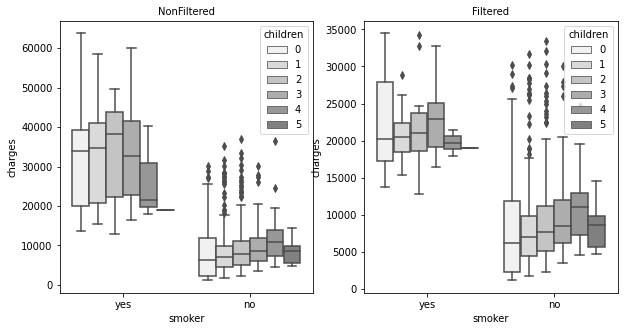

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(color = "grey", x='smoker', y='charges', data=df,
           hue="children", ax=axes[0])
sns.boxplot(color = "grey", x='smoker', y='charges', data=filteredDf,
           hue="children", ax=axes[1])

axes[0].set_title('NonFiltered', fontsize=10)
axes[1].set_title('Filtered', fontsize=10)

plt.show()

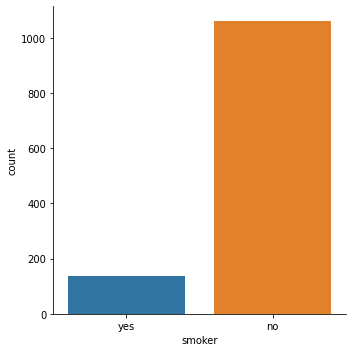

In [33]:
sns.catplot(data=filteredDf, kind="count", x='smoker')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


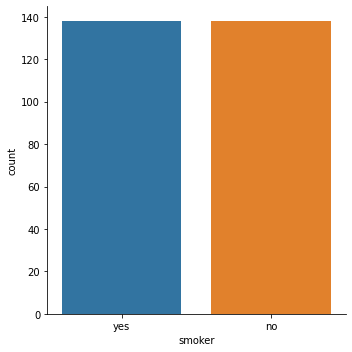

In [35]:
num_0 = sum(filteredDf.smoker=='yes')
num_1 = sum(filteredDf.smoker=='no')

undersampledDf = pd.concat([filteredDf[filteredDf['smoker']=='yes'].sample(num_0), 
                            filteredDf[filteredDf['smoker']=='no'].sample(num_0)])

sns.catplot(data=undersampledDf, kind="count", x='smoker', ax=axes[1])

plt.show()

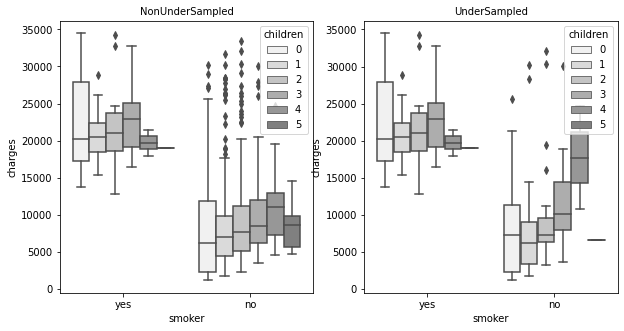

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(color = "grey", x='smoker', y='charges', data=filteredDf,
           hue="children", ax=axes[0])
sns.boxplot(color = "grey", x='smoker', y='charges', data=undersampledDf,
           hue="children", ax=axes[1])

axes[0].set_title('NonUnderSampled', fontsize=10)
axes[1].set_title('UnderSampled', fontsize=10)

plt.show()

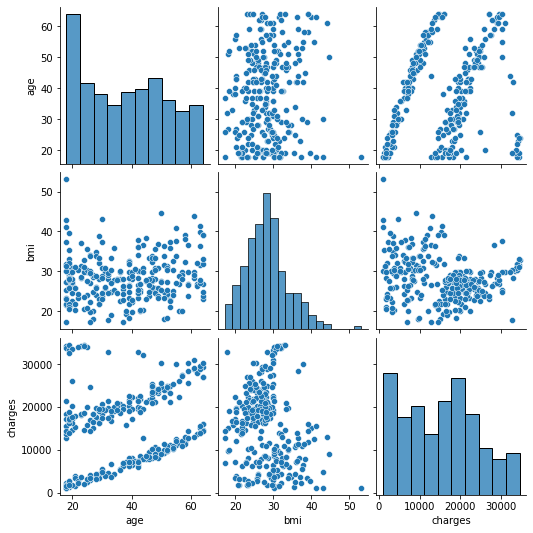

In [43]:
targetVar = ['age', 'bmi', 'charges']
g = sns.pairplot(undersampledDf, vars = targetVar)

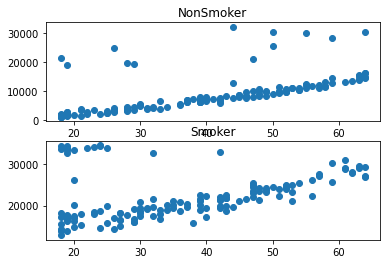

In [44]:
dfNonsmoker = undersampledDf[undersampledDf.smoker=="no"]
dfsmoker = undersampledDf[undersampledDf.smoker=="yes"]

plt.subplot(2, 1, 1)
plt.plot(dfNonsmoker["age"], dfNonsmoker['charges'], 'o')
plt.title('NonSmoker')

plt.subplot(2, 1, 2)
plt.plot(dfsmoker["age"], dfsmoker['charges'], 'o')
plt.title('Smoker')

plt.show()